## 2,4호선 데이터 정제

#### 배차시간 데이터 확인

In [1]:
#### 배차시간 데이터 확인
import pandas as pd
subway_time = pd.read_csv("../Data/지하철배차시간데이터/서울교통공사_서울 도시철도 열차운행시각표_20240305.csv", encoding='euc-kr')
#서울교통공사_서울 도시철도 열차운행시각표_20240305.csv

/var/folders/5b/bk7dwjqs57d1fzmtyxy952540000gn/T/ipykernel_22766/1770200333.py:3: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  subway_time = pd.read_csv("../Data/지하철배차시간데이터/서울교통공사_서울 도시철도 열차운행시각표_20240305.csv", encoding='euc-kr')


In [2]:
subway_time[subway_time['호선'] == 3]
subway_time[subway_time['역사코드'] == 342.0 ]
subway_time[subway_time['방향'] == 'UP']
# subway_time[subway_time['주중주말'] == 'END']['호선']
# subway_time['주중주말'].unique()
#159905 -> Down
#157824 _ Up

,고유번호,호선,역사코드,역사명,주중주말,방향,급행여부,열차코드,열차도착시간,열차출발시간,출발역,도착역
27913,27914,3,342.0,오금,DAY,UP,0,3024K,NaN,05:31:00,오금,대화
27914,27915,3,342.0,오금,DAY,UP,0,3026,NaN,05:38:00,오금,대화
27915,27916,3,342.0,오금,DAY,UP,0,3032,NaN,05:47:30,오금,대화
27916,27917,3,342.0,오금,DAY,UP,0,3040K,NaN,06:01:00,오금,대화
27917,27918,3,342.0,오금,DAY,UP,0,3046,NaN,06:10:00,오금,대화
...,...,...,...,...,...,...,...,...,...,...,...,...
373619,373620,2,234.0,신도림,DAY,UP,0,5711,00:07:00,NaN,까치산,신도림
373620,373621,8,2814.0,몽촌토성,SAT,UP,0,8030,07:44:30,07:45:00,모란,암사
373621,373622,8,2815.0,잠실,SAT,UP,0,8026,07:25:40,07:26:20,모란,암사
373622,373623,5,2537.0,동대문역사문화공원,SAT,UP,0,5598,15:54:40,15:55:20,마천,방화


### 2호선 말고는 END값이 없다!

### 전체 노선 기준 상행선 157824, 하행선 159905 로 상, 하행선의 차이는 미미하다!

In [3]:
subway_time[(subway_time['역사코드'] == 150.0) & (subway_time['방향'] == 'UP')]
subway_time[(subway_time['역사코드'] == 150.0) & (subway_time['방향'] == 'DOWN')]

,고유번호,호선,역사코드,역사명,주중주말,방향,급행여부,열차코드,열차도착시간,열차출발시간,출발역,도착역
194333,194334,1,150.0,서울역,DAY,DOWN,0,K11,05:30:00,05:30:30,광운대,인천
194334,194335,1,150.0,서울역,DAY,DOWN,0,K13,05:39:00,05:39:30,창동,인천
194335,194336,1,150.0,서울역,DAY,DOWN,0,K17,05:58:00,05:58:30,의정부,인천
194336,194337,1,150.0,서울역,DAY,DOWN,0,K19,06:05:00,06:05:30,양주,인천
194337,194338,1,150.0,서울역,DAY,DOWN,0,S15,05:48:30,05:49:00,동묘앞,인천
...,...,...,...,...,...,...,...,...,...,...,...,...
233926,233927,1,150.0,서울역,SAT,DOWN,0,K823,23:37:30,23:38:00,동두천,구로
233927,233928,1,150.0,서울역,SAT,DOWN,0,K821,23:30:00,23:30:30,양주,구로
233928,233929,1,150.0,서울역,SAT,DOWN,0,K827,23:52:30,23:53:00,소요산,구로
233929,233930,1,150.0,서울역,SAT,DOWN,0,K825,23:45:00,23:45:30,의정부,구로


### 서울역 기준 상행선 507개, 하행선 504로 상, 하행선의 차이는 미미하다!

### 열차 출발시간, 도착시간에 NaN 값 존재!
기준을 출발로 잡아야 하나, 도착으로 잡아야 하나?


In [4]:
subway_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373624 entries, 0 to 373623
Data columns (total 12 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   고유번호    373624 non-null  int64  
 1   호선      373624 non-null  int64  
 2   역사코드    373131 non-null  float64
 3   역사명     373624 non-null  object 
 4   주중주말    373624 non-null  object 
 5   방향      373624 non-null  object 
 6   급행여부    373624 non-null  int64  
 7   열차코드    373624 non-null  object 
 8   열차도착시간  357878 non-null  object 
 9   열차출발시간  349446 non-null  object 
 10  출발역     373624 non-null  object 
 11  도착역     373624 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 34.2+ MB


#### 열차 도착시간의 nonnulll값이 출발보다 크므로 도착시간 기준으로 배차간격 계산!

In [5]:
#  열차 도착시간의 NaN 값을 열차출발시간 값으로 대체
subway_time['열차도착시간'] = subway_time['열차도착시간'].fillna(subway_time['열차출발시간'])

In [6]:

subway_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373624 entries, 0 to 373623
Data columns (total 12 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   고유번호    373624 non-null  int64  
 1   호선      373624 non-null  int64  
 2   역사코드    373131 non-null  float64
 3   역사명     373624 non-null  object 
 4   주중주말    373624 non-null  object 
 5   방향      373624 non-null  object 
 6   급행여부    373624 non-null  int64  
 7   열차코드    373624 non-null  object 
 8   열차도착시간  373624 non-null  object 
 9   열차출발시간  349446 non-null  object 
 10  출발역     373624 non-null  object 
 11  도착역     373624 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 34.2+ MB


## 비상비상비상!!!!! 역사코드에도 Nan값이 있네?


In [7]:
# '역사코드' 열에서 NaN 값만 출력
subway_time[subway_time['역사코드'].isna()]['역사명'].unique()

array(['마전', '남위례'], dtype=object)

# 역사 코드 없는 역은 남위례(8호선), 마전(인천 2호선)
-> 교통공사 데이터 확인후 남위례의 역 번호가 2828 인것을 확인, 마전은 필요없는 데이터
### 남위례의 역 번호를 2828로 대체필요!

In [8]:
# subway_time[subway_time['역사명'] == '남위례']['역사코드'] = 2828
subway_time.loc[subway_time['역사명'] == '남위례', '역사코드'] = 2828

In [9]:
subway_time[subway_time['역사명'] == '남위례']

,고유번호,호선,역사코드,역사명,주중주말,방향,급행여부,열차코드,열차도착시간,열차출발시간,출발역,도착역
329174,329175,8,2828.0,남위례,SAT,UP,0,8122,14:00:30,14:01:00,모란,암사
329175,329176,8,2828.0,남위례,SAT,UP,0,8124,14:09:00,14:09:30,모란,암사
329176,329177,8,2828.0,남위례,SAT,UP,0,8126,14:17:30,14:18:00,모란,암사
329177,329178,8,2828.0,남위례,SAT,UP,0,8128,14:26:00,14:26:30,모란,암사
329178,329179,8,2828.0,남위례,SAT,UP,0,8130,14:34:30,14:35:00,모란,암사
...,...,...,...,...,...,...,...,...,...,...,...,...
331333,331334,8,2828.0,남위례,SAT,DOWN,0,8241,23:10:00,23:10:30,암사,모란
331334,331335,8,2828.0,남위례,SAT,DOWN,0,8243,23:21:00,23:21:30,암사,모란
331335,331336,8,2828.0,남위례,SAT,DOWN,0,8245,23:32:00,23:32:30,암사,모란
331336,331337,8,2828.0,남위례,SAT,DOWN,0,8247,23:44:00,23:44:30,암사,모란


### 변환한 데이터로 시간 범위 구하기

In [10]:
subway_time=subway_time[subway_time['호선'] == 7]

In [11]:
subway_time.head()

,고유번호,호선,역사코드,역사명,주중주말,방향,급행여부,열차코드,열차도착시간,열차출발시간,출발역,도착역
111149,111150,7,3763.0,석남,DAY,UP,0,7016,05:28:00,05:28:00,석남,도봉산
111150,111151,7,3763.0,석남,DAY,UP,0,7020,05:41:30,05:41:30,석남,도봉산
111151,111152,7,3763.0,석남,DAY,UP,0,7024,05:55:30,05:55:30,석남,도봉산
111152,111153,7,3763.0,석남,DAY,UP,0,7026,06:02:30,06:02:30,석남,장암
111153,111154,7,3763.0,석남,DAY,UP,0,7028,06:09:30,06:09:30,석남,장암


In [12]:
subway_time['열차시간계산']=subway_time['열차도착시간'].str.split(':').str[0]

In [13]:
subway_time['주중주말'].unique()


array(['DAY', 'SAT'], dtype=object)

END: 일요일,공휴일      
DAY: 주중    
SAT: 토요일     

In [14]:
subway_time.head()

,고유번호,호선,역사코드,역사명,주중주말,방향,급행여부,열차코드,열차도착시간,열차출발시간,출발역,도착역,열차시간계산
111149,111150,7,3763.0,석남,DAY,UP,0,7016,05:28:00,05:28:00,석남,도봉산,05
111150,111151,7,3763.0,석남,DAY,UP,0,7020,05:41:30,05:41:30,석남,도봉산,05
111151,111152,7,3763.0,석남,DAY,UP,0,7024,05:55:30,05:55:30,석남,도봉산,05
111152,111153,7,3763.0,석남,DAY,UP,0,7026,06:02:30,06:02:30,석남,장암,06
111153,111154,7,3763.0,석남,DAY,UP,0,7028,06:09:30,06:09:30,석남,장암,06


## 주중, 토요일 , 공유일의 배차 간격이 다르기 때문에 테이블을 3개로 분할해서 확인 필요!
-> 테이블 분할대신 주중주말 컬럼을 활용해 구분하자!

In [15]:
# subway_time_Day = subway_time[subway_time['주중주말'] == 'DAY']
# subway_time_End = subway_time[subway_time['주중주말'] == 'END']
# subway_time_Sat = subway_time[subway_time['주중주말'] == 'SAT']

# len(subway_time_Sat)

In [16]:
# # 주중 데이터
# # '역사명'과 '시간'이 같은 데이터 그룹화
# grouped = subway_time_Day.groupby(['역사코드', '열차시간계산'])
# # 각 그룹의 크기(개수) 계산
# count = grouped.size().rename('차량수')
# # 결과를 DataFrame으로 변환
# interval_day = count.reset_index()
# # 열 이름 지정
# interval_day.columns = ['역사코드', '시간', '배차수']

# interval_day.head()


In [17]:
# # 공휴일 데이터
# # '역사명'과 '시간'이 같은 데이터 그룹화
# grouped = subway_time_End.groupby(['역사코드', '열차시간계산'])
# # 각 그룹의 크기(개수) 계산
# count = grouped.size().rename('차량수')
# # 결과를 DataFrame으로 변환
# interval_end = count.reset_index()
# # 열 이름 지정
# interval_end.columns = ['역사코드', '시간', '배차수']

# interval_end.head()


In [18]:
# 새로운 테이블 만들기
# '역사명'과 '시간'이 같은 데이터 그룹화
grouped = subway_time.groupby(['역사코드', '열차시간계산','주중주말'])
# 각 그룹의 크기(개수) 계산
count = grouped.size().rename('차량수')
# 결과를 DataFrame으로 변환
interval = count.reset_index()
# 열 이름 지정
interval.columns = ['역사코드', '시간', '주중주말','배차수']

interval.tail()


,역사코드,시간,주중주말,배차수
2101,3763.0,21,SAT,12
2102,3763.0,22,DAY,9
2103,3763.0,22,SAT,11
2104,3763.0,23,DAY,8
2105,3763.0,23,SAT,8


In [19]:
interval['주중주말'].unique()

array(['DAY', 'SAT'], dtype=object)

In [20]:
# 시간에 중복값이 있는지 확인!
# print(interval_day['시간'].unique())
# print(interval_sat['시간'].unique())
# print(interval_end['시간'].unique())
# interval_sat.index
# interval_end.index
# interval_day.index
# print(interval_sat['시간'].duplicated().sum())

# print(interval_sat['시간'].dtype)
# print(interval_day['시간'].dtype)

In [21]:
# 역사코드 int로 변경
interval['역사코드'] = interval['역사코드'].astype('int64')
# interval_end['역사코드'] = interval_sat['역사코드'].astype('int64')
# interval_day['역사코드'] = interval_sat['역사코드'].astype('int64')



#### 서울교통공사_역별 일별 시간대별 승하차인원 정보 와 join 시키기 위해 interval 테이블 변경
 조인 시켜야 할 데이터 셋
![스크린샷 2024-06-03 오후 3.15.41.png](<attachment:스크린샷 2024-06-03 오후 3.15.41.png>)
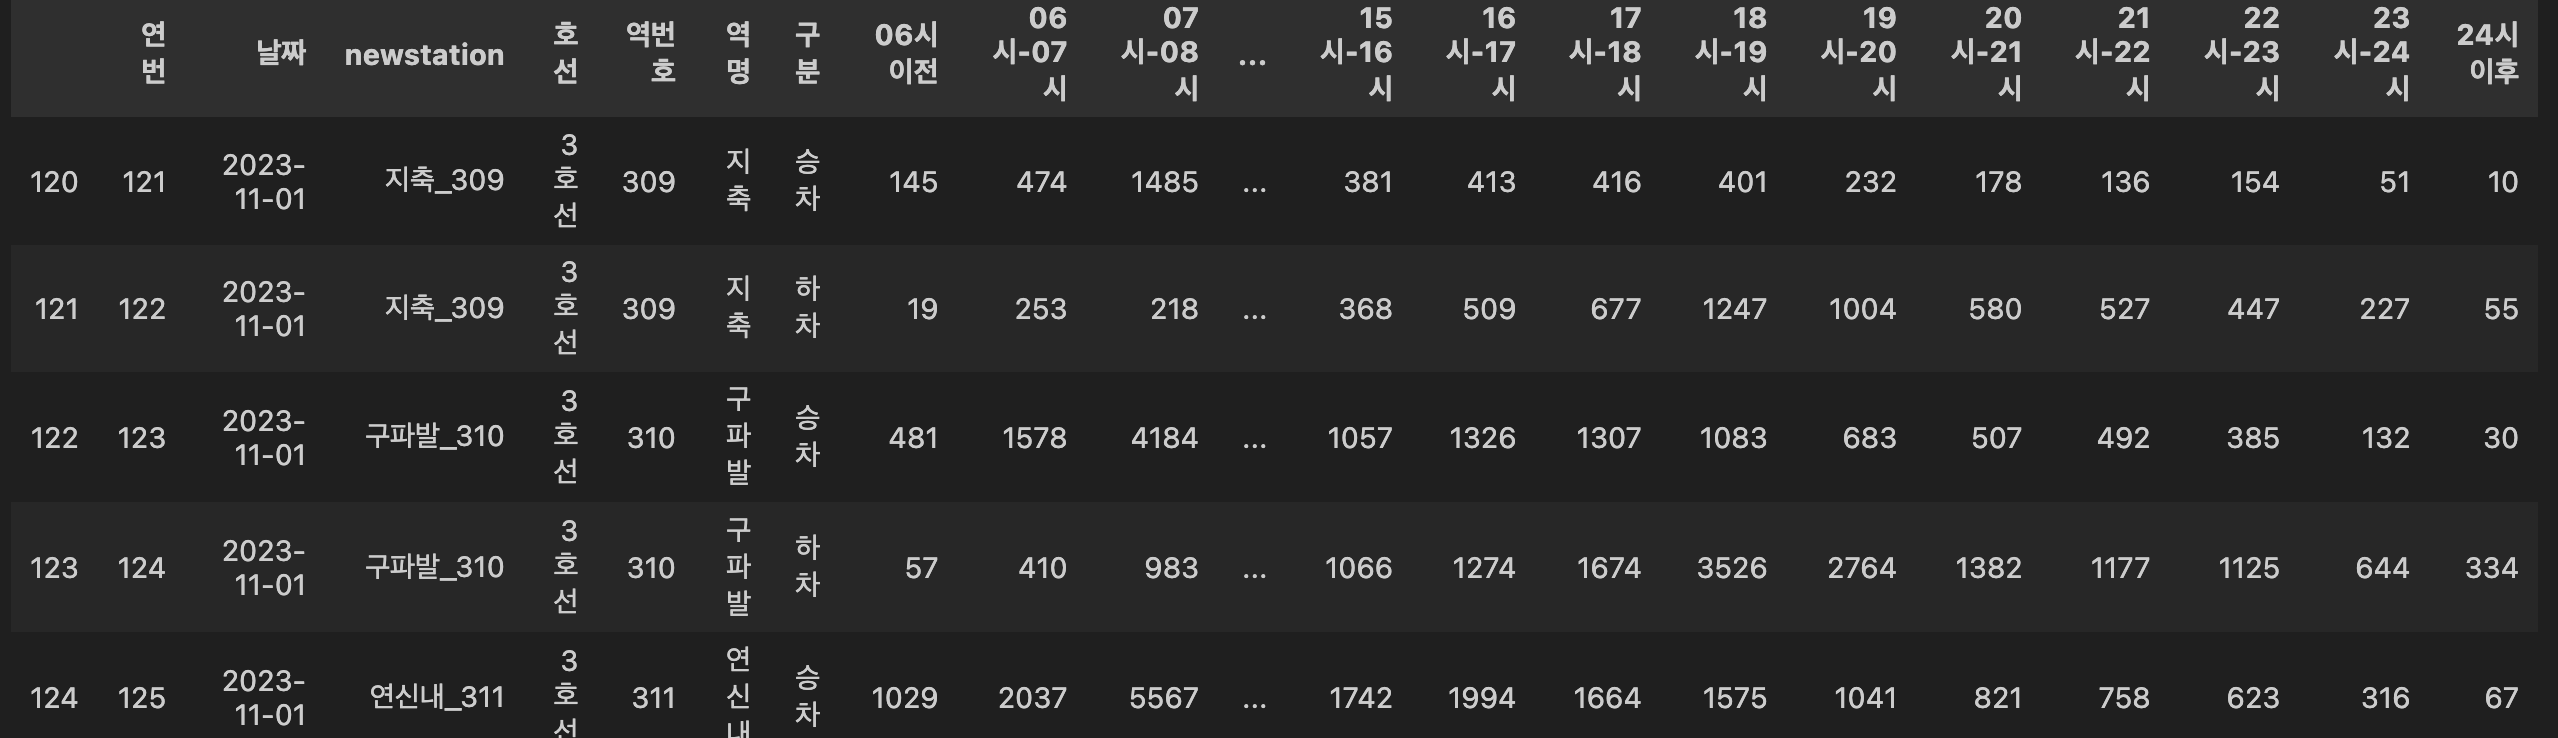

> 역 번호를 기준으로 시간 column에 배차수를 넣어서 자료를 다시 정리해야함!

In [22]:
# interval.pivot(index='역사코드', columns='시간', values='배차수')
# # interval_end.pivot(index='역사코드', columns='시간', values='배차수')
# # interval_day.pivot(index='역사코드', columns='시간', values='배차수')
# interval['역사코드'].info()
# # interval_sat
# # interval_end
# # interval_day


In [23]:
# interval=interval.pivot_table(index=['역사코드', '주중주말'], columns='시간', values='배차수', aggfunc='mean')
# # # 인덱스를 열로 리셋
# # pivot_df_reset = interval.reset_index()

# # # 인덱스를 새로 설정하여 포맷 변경
# # pivot_df_reset = pivot_df_reset.set_index(['역사코드', '주중주말'])

# interval.head()


In [24]:
# 피벗 테이블 생성
pivot_df = interval.pivot_table(index=['역사코드', '주중주말'], columns='시간', values='배차수', aggfunc='mean')


# # 인덱스를 열로 리셋
interval = pivot_df.reset_index()

# # 첫 번째 인덱스 열을 추가하여 새로운 데이터프레임 생성
interval['역사코드2'] = interval['역사코드']
interval.drop(columns=['역사코드2'],inplace=True)

interval.index = interval['역사코드']
interval.drop(columns=['역사코드'],inplace=True)
interval.fillna(0, inplace=True)
# # '역사코드2'를 사용하여 새로운 인덱스 설정
# pivot_df_reindexed = pivot_df_reset.set_index(['역사코드2', '주중주말'])

# # 불필요한 '역사코드' 열 삭제
# pivot_df_reindexed = pivot_df_reindexed.drop(columns=['역사코드'])

# # 출력 형식 수정: 인덱스를 리셋하고 다시 설정하여 '역사코드'를 모든 행에 표시
# pivot_df_reindexed.reset_index(inplace=True)
# pivot_df_reindexed.set_index(['역사코드2', '주중주말'], inplace=True)

# pivot_df_reindexed
interval


시간,주중주말,00,05,06,07,08,09,10,11,12,...,14,15,16,17,18,19,20,21,22,23
역사코드,,,,,,,,,,,,,,,,,,,,,
2711,DAY,0.0,3.0,9.0,10.0,12.0,11.0,10.0,10.0,10.0,...,10.0,10.0,9.0,9.0,12.0,10.0,9.0,8.0,4.0,6.0
2711,SAT,0.0,3.0,7.0,7.0,7.0,6.0,8.0,9.0,8.0,...,7.0,6.0,7.0,8.0,9.0,7.0,7.0,8.0,7.0,7.0
2712,DAY,2.0,5.0,15.0,28.0,31.0,29.0,24.0,20.0,20.0,...,20.0,20.0,20.0,25.0,29.0,26.0,24.0,20.0,16.0,12.0
2712,SAT,2.0,5.0,13.0,18.0,19.0,20.0,20.0,20.0,20.0,...,20.0,20.0,20.0,20.0,20.0,20.0,20.0,18.0,16.0,10.0
2713,DAY,1.0,6.0,15.0,27.0,31.0,31.0,24.0,20.0,20.0,...,20.0,20.0,20.0,24.0,28.0,28.0,24.0,18.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2761,SAT,1.0,4.0,11.0,11.0,10.0,10.0,10.0,10.0,10.0,...,10.0,10.0,10.0,10.0,10.0,10.0,9.0,12.0,11.0,9.0
3762,DAY,1.0,5.0,12.0,16.0,20.0,16.0,12.0,10.0,10.0,...,10.0,10.0,11.0,10.0,17.0,15.0,11.0,10.0,8.0,9.0
3762,SAT,1.0,4.0,11.0,11.0,10.0,10.0,10.0,10.0,10.0,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,11.0,11.0,9.0


In [48]:
cols = interval.columns.tolist()
cols.append(cols.pop(cols.index('00')))
interval = interval[cols]

interval.rename(columns={'00': '24'}, inplace=True)

In [49]:
#역 갯수
len(interval.index)

106

In [50]:
interval.head()

시간,주중주말,05,06,07,08,09,10,11,12,13,...,15,16,17,18,19,20,21,22,23,24
역사코드,,,,,,,,,,,,,,,,,,,,,
2711,DAY,3.0,9.0,10.0,12.0,11.0,10.0,10.0,10.0,10.0,...,10.0,9.0,9.0,12.0,10.0,9.0,8.0,4.0,6.0,0.0
2711,SAT,3.0,7.0,7.0,7.0,6.0,8.0,9.0,8.0,8.0,...,6.0,7.0,8.0,9.0,7.0,7.0,8.0,7.0,7.0,0.0
2712,DAY,5.0,15.0,28.0,31.0,29.0,24.0,20.0,20.0,20.0,...,20.0,20.0,25.0,29.0,26.0,24.0,20.0,16.0,12.0,2.0
2712,SAT,5.0,13.0,18.0,19.0,20.0,20.0,20.0,20.0,20.0,...,20.0,20.0,20.0,20.0,20.0,20.0,18.0,16.0,10.0,2.0
2713,DAY,6.0,15.0,27.0,31.0,31.0,24.0,20.0,20.0,20.0,...,20.0,20.0,24.0,28.0,28.0,24.0,18.0,17.0,13.0,1.0


### 성공!!!!!!

## 원래있던 DataFrame과 합쳐야하네? 
-> 역사코드를 기준으로 column 추가      
-> 원레 데이터에서 공유일 column 추가!

In [51]:
interval.to_csv('../Data/지하철배차시간데이터/interval.csv')

In [27]:
import pandas as pd ,numpy as  np # Data manipulatioin
import seaborn as sns,matplotlib.pyplot as plt # visiulization
import warnings;warnings.filterwarnings('ignore') # 경고 무시 
# 기본 세팅
def plotSetting(pltStyle):
    import matplotlib.pyplot as plt # visiulization
    import platform
    from matplotlib import font_manager, rc # rc : 폰트 변경 모듈font_manager : 폰트 관리 모듈
    plt.style.use(pltStyle)
    plt.rcParams['axes.unicode_minus'] = False# unicode 설정
    if platform.system() == 'Darwin': rc('font', family='AppleGothic') # os가 macos
    elif platform.system() == 'Windows': # os가 windows
        path = 'c:/Windows/Fonts/malgun.ttf' 
        font_name = font_manager.FontProperties(fname=path).get_name()
        rc('font', family=font_name)
    else:
        print("Unknown System")
    print("___## OS platform 한글 세팅완료 ## ___")
# graph style seaborn
plotSetting("seaborn-v0_8")


___## OS platform 한글 세팅완료 ## ___


In [28]:
# 서울교통공사_역별 일별 시간대별 승하차인원 정보_23.11_24.01.csv

# Data loading 
subway = pd.read_csv("../Data/교통공사데이터/서울교통공사_역별 일별 시간대별 승하차인원 정보_23.11_24.01.csv", encoding='euc-kr')
subway.head()

,연번,날짜,호선,역번호,역명,구분,06시 이전,06시-07시,07시-08시,08시-09시,...,15시-16시,16시-17시,17시-18시,18시-19시,19시-20시,20시-21시,21시-22시,22시-23시,23시-24시,24시 이후
0,1,2023-11-01,1호선,150,서울역,승차,342,520,1929,2864,...,3265,3834,6739,9519,4370,2870,2550,1641,753,72
1,2,2023-11-01,1호선,150,서울역,하차,300,2166,5186,10500,...,2372,2231,3041,3053,1729,1249,1114,734,381,108
2,3,2023-11-01,1호선,151,시청,승차,86,157,303,415,...,1973,2508,4322,7531,2677,2211,2100,1250,399,31
3,4,2023-11-01,1호선,151,시청,하차,220,1014,3464,9344,...,971,973,1102,1012,556,321,264,174,108,40
4,5,2023-11-01,1호선,152,종각,승차,144,167,256,454,...,2364,2805,6649,10098,3847,3149,3366,2330,908,38


In [29]:
subway[subway['역명'] == '남위례']

,연번,날짜,호선,역번호,역명,구분,06시 이전,06시-07시,07시-08시,08시-09시,...,15시-16시,16시-17시,17시-18시,18시-19시,19시-20시,20시-21시,21시-22시,22시-23시,23시-24시,24시 이후
544,545,2023-11-01,8호선,2828,남위례,승차,66,289,1035,1552,...,311,513,667,812,288,229,242,197,70,35
545,546,2023-11-01,8호선,2828,남위례,하차,38,128,337,1259,...,329,385,628,1125,800,411,367,340,193,71
1090,1091,2023-11-02,8호선,2828,남위례,승차,62,289,988,1254,...,337,531,679,839,325,246,262,226,78,26
1091,1092,2023-11-02,8호선,2828,남위례,하차,37,136,338,1221,...,406,442,661,1113,781,419,392,383,211,76
1636,1637,2023-11-03,8호선,2828,남위례,승차,62,263,939,1137,...,370,591,707,815,351,265,255,185,103,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49143,49144,2024-01-29,8호선,2828,남위례,하차,41,127,313,921,...,314,356,557,1136,783,394,371,328,155,63
49688,49689,2024-01-30,8호선,2828,남위례,승차,62,300,873,1104,...,330,394,605,809,317,288,233,165,74,38
49689,49690,2024-01-30,8호선,2828,남위례,하차,37,131,306,954,...,350,439,588,1022,794,421,421,317,202,96
50236,50237,2024-01-31,8호선,2828,남위례,승차,54,283,923,1111,...,379,392,613,789,338,263,251,202,105,33


In [30]:
# 2,4 호선 정보 빼기
line_7=subway[subway['호선'] == '7호선']


In [31]:
line_7.tail()

#2023-11-01 ~ 2024-01-31 사이의 데이터

,연번,날짜,호선,역번호,역명,구분,06시 이전,06시-07시,07시-08시,08시-09시,...,15시-16시,16시-17시,17시-18시,18시-19시,19시-20시,20시-21시,21시-22시,22시-23시,23시-24시,24시 이후
50197,50198,2024-01-31,7호선,2750,광명사거리,하차,195,446,638,922,...,1332,1441,1900,3204,2556,1227,1032,873,548,194
50198,50199,2024-01-31,7호선,2751,천왕,승차,321,777,2285,2654,...,401,468,549,585,248,166,173,122,51,10
50199,50200,2024-01-31,7호선,2751,천왕,하차,42,231,315,584,...,556,774,1153,1958,1652,891,724,573,357,110
50200,50201,2024-01-31,7호선,2752,온수(성공회대입구),승차,337,793,1930,2264,...,297,370,451,486,213,124,161,109,50,11
50201,50202,2024-01-31,7호선,2752,온수(성공회대입구),하차,33,128,330,567,...,380,509,831,1673,1343,660,527,506,330,237


In [32]:
#2호선 데이터 확인
def dataInfoProcessing(line_7, replace_Nan=False):
        
    print("\n1. Data colum numbers : ",len(line_7.columns))
    #print(subway.dolumns3)
    #print(subway.info())
    null_message =f"총 {line_7.isnull().sum().sum()}개의 null 이 있습니다!" if line_7.isnull().sum().sum() else "Null 없는 clean data!"
    print("\n2. null ceck 결과",null_message)
    ### Null 이 있는 칼럼 추출
    haveNullColumn =[]
    for idx, col in enumerate(line_7.columns):
        if line_7[f"{col}"].isnull().sum():
            print(f"   => {idx}번째.[{col}]컬럼 : ",f"null {line_7[f'{col}'].isnull().sum()} 개,\t not null {line_7[f'{col}'].notnull().sum()} 개")
            ## Null data fill
    if replace_Nan : ## nan 을 0 으로 대체 
        line_7[col].fillna(value=0, inplace=True)  
    
    print("\n3. Column  Information (중복체크)")
    print( "\tidx.columName |\t\t\t\t |Colum Info(dtype)|** ")
    print( "\t","--"*len("columIdx |\t\t\t\t **|Col(dtype)|** "))
    for idx, col in enumerate(line_7.dtypes.keys()):
        if idx< 7:
            if len(f"\t{idx}.[{col}({line_7.dtypes[col]})]:")<20:
                print(f"\t{idx}.[{col}({line_7.dtypes[col]})]:",\
                    f"{len(line_7[col].unique())}/{len(line_7[col])} [uniq/raw]", sep=" \t\t\t")
            else:
                    print(f"\t{idx}.[{col}({line_7.dtypes[col]})]:",\
                    f"{len(line_7[col].unique())}/{len(line_7[col])} [uniq/raw]", sep=" \t\t")

    else: 
        print(f"\t ...etc (추가로 {len(line_7.dtypes.keys())-5}개의 칼럼이 있습니다 )")
   
              
dataInfoProcessing(subway)

# subway.info(show_counts=False)
# subway.value_counts('수송일자')






1. Data colum numbers :  26

2. null ceck 결과 Null 없는 clean data!

3. Column  Information (중복체크)
	idx.columName |				 |Colum Info(dtype)|** 
	 ----------------------------------------------------------------
	0.[연번(int64)]: 			50238/50238 [uniq/raw]
	1.[날짜(object)]: 			92/50238 [uniq/raw]
	2.[호선(object)]: 			8/50238 [uniq/raw]
	3.[역번호(int64)]: 			278/50238 [uniq/raw]
	4.[역명(object)]: 			244/50238 [uniq/raw]
	5.[구분(object)]: 			2/50238 [uniq/raw]
	6.[06시 이전(int64)]: 			1248/50238 [uniq/raw]
	 ...etc (추가로 21개의 칼럼이 있습니다 )


### 위의 결과로 보아2023-11-01 ~ 2024-01-31 사이의 데이터 셋에는 null 값이나 특이점이 있는 데이터가 없음!

In [33]:

line_7.head()

,연번,날짜,호선,역번호,역명,구분,06시 이전,06시-07시,07시-08시,08시-09시,...,15시-16시,16시-17시,17시-18시,18시-19시,19시-20시,20시-21시,21시-22시,22시-23시,23시-24시,24시 이후
426,427,2023-11-01,7호선,2711,장암,승차,95,374,953,476,...,81,96,87,109,36,32,16,11,11,2
427,428,2023-11-01,7호선,2711,장암,하차,8,69,59,49,...,35,53,82,152,156,97,38,34,29,7
428,429,2023-11-01,7호선,2712,도봉산,승차,259,799,2343,1834,...,419,495,476,491,195,132,98,102,35,10
429,430,2023-11-01,7호선,2712,도봉산,하차,39,168,357,702,...,547,690,966,1605,1619,937,731,618,412,169
430,431,2023-11-01,7호선,2713,수락산,승차,388,967,2180,2109,...,613,599,679,644,384,253,184,118,76,12


In [34]:
line_7['역명']
# line_['역명']= "구파발"

426              장암
427              장암
428             도봉산
429             도봉산
430             수락산
            ...    
50197         광명사거리
50198            천왕
50199            천왕
50200    온수(성공회대입구)
50201    온수(성공회대입구)
Name: 역명, Length: 7734, dtype: object

In [35]:
#새로운 역명 이름 생성
line_7['newstation'] = line_7['역명'] + "_"+line_7['역번호'].astype(str)

line_7.head()

,연번,날짜,호선,역번호,역명,구분,06시 이전,06시-07시,07시-08시,08시-09시,...,16시-17시,17시-18시,18시-19시,19시-20시,20시-21시,21시-22시,22시-23시,23시-24시,24시 이후,newstation
426,427,2023-11-01,7호선,2711,장암,승차,95,374,953,476,...,96,87,109,36,32,16,11,11,2,장암_2711
427,428,2023-11-01,7호선,2711,장암,하차,8,69,59,49,...,53,82,152,156,97,38,34,29,7,장암_2711
428,429,2023-11-01,7호선,2712,도봉산,승차,259,799,2343,1834,...,495,476,491,195,132,98,102,35,10,도봉산_2712
429,430,2023-11-01,7호선,2712,도봉산,하차,39,168,357,702,...,690,966,1605,1619,937,731,618,412,169,도봉산_2712
430,431,2023-11-01,7호선,2713,수락산,승차,388,967,2180,2109,...,599,679,644,384,253,184,118,76,12,수락산_2713


In [36]:
#필요 없어진 역명,역이름 컬럼삭제
# line_3 = line_3.drop(['역명', '역번호'], axis=1)
# line_4 = line_4.drop(['역명', '역번호'], axis=1)


In [37]:
line_7.head()
line_7.columns

Index(['연번', '날짜', '호선', '역번호', '역명', '구분', '06시 이전', '06시-07시', '07시-08시',
       '08시-09시', '09시-10시', '10시-11시', '11시-12시', '12시-13시', '13시-14시',
       '14시-15시', '15시-16시', '16시-17시', '17시-18시', '18시-19시', '19시-20시',
       '20시-21시', '21시-22시', '22시-23시', '23시-24시', '24시 이후', 'newstation'],
      dtype='object')

#### column 순서 재배치

In [38]:
# 현재 열 이름 리스트 가져오기
columns = line_7.columns.tolist()

# 20번째 열 이름
col_to_move = columns[26]  

# 20번째 열을 제외한 나머지 열 이름
remaining_cols = [c for c in columns if c != col_to_move]

# 새로운 열 순서 지정
new_column_order = remaining_cols[:2] + [col_to_move] + remaining_cols[2:]

# 열 순서 변경
line_7 = line_7.reindex(columns=new_column_order)
line_7.head()

,연번,날짜,newstation,호선,역번호,역명,구분,06시 이전,06시-07시,07시-08시,...,15시-16시,16시-17시,17시-18시,18시-19시,19시-20시,20시-21시,21시-22시,22시-23시,23시-24시,24시 이후
426,427,2023-11-01,장암_2711,7호선,2711,장암,승차,95,374,953,...,81,96,87,109,36,32,16,11,11,2
427,428,2023-11-01,장암_2711,7호선,2711,장암,하차,8,69,59,...,35,53,82,152,156,97,38,34,29,7
428,429,2023-11-01,도봉산_2712,7호선,2712,도봉산,승차,259,799,2343,...,419,495,476,491,195,132,98,102,35,10
429,430,2023-11-01,도봉산_2712,7호선,2712,도봉산,하차,39,168,357,...,547,690,966,1605,1619,937,731,618,412,169
430,431,2023-11-01,수락산_2713,7호선,2713,수락산,승차,388,967,2180,...,613,599,679,644,384,253,184,118,76,12


### 3,4 호선 승하차 구분

In [39]:
#4호선 승차
line_7_on=line_7.iloc[::2, :]
#4호선 하차
line_7_off=line_7.iloc[1::2, :]




In [40]:
line_7_on.head()

,연번,날짜,newstation,호선,역번호,역명,구분,06시 이전,06시-07시,07시-08시,...,15시-16시,16시-17시,17시-18시,18시-19시,19시-20시,20시-21시,21시-22시,22시-23시,23시-24시,24시 이후
426,427,2023-11-01,장암_2711,7호선,2711,장암,승차,95,374,953,...,81,96,87,109,36,32,16,11,11,2
428,429,2023-11-01,도봉산_2712,7호선,2712,도봉산,승차,259,799,2343,...,419,495,476,491,195,132,98,102,35,10
430,431,2023-11-01,수락산_2713,7호선,2713,수락산,승차,388,967,2180,...,613,599,679,644,384,253,184,118,76,12
432,433,2023-11-01,마들_2714,7호선,2714,마들,승차,434,1176,2967,...,605,529,465,516,311,223,119,94,43,12
434,435,2023-11-01,노원_2715,7호선,2715,노원,승차,311,686,1791,...,1352,1378,1512,1725,1028,949,849,808,255,46


### 날짜 -> 월,주, 요일구분(휴일인지 아닌지)

### 요일 변환하기

In [43]:
from datetime import datetime, timedelta
years = []
weeks = []
months = []

datas = line_7['날짜']

for data in datas :
    
    print(data[0:4])
    
    date_obj = pd.to_datetime(data)
    year, week, _ = date_obj.isocalendar()
    month = date_obj.month
    
    print(month)
    years.append(year)
    weeks.append(week)
    months.append(month)



2023
11
2023
11
2023
11
2023
11
2023
11
2023
11
2023
11
2023
11
2023
11
2023
11
2023
11
2023
11
2023
11
2023
11
2023
11
2023
11
2023
11
2023
11
2023
11
2023
11
2023
11
2023
11
2023
11
2023
11
2023
11
2023
11
2023
11
2023
11
2023
11
2023
11
2023
11
2023
11
2023
11
2023
11
2023
11
2023
11
2023
11
2023
11
2023
11
2023
11
2023
11
2023
11
2023
11
2023
11
2023
11
2023
11
2023
11
2023
11
2023
11
2023
11
2023
11
2023
11
2023
11
2023
11
2023
11
2023
11
2023
11
2023
11
2023
11
2023
11
2023
11
2023
11
2023
11
2023
11
2023
11
2023
11
2023
11
2023
11
2023
11
2023
11
2023
11
2023
11
2023
11
2023
11
2023
11
2023
11
2023
11
2023
11
2023
11
2023
11
2023
11
2023
11
2023
11
2023
11
2023
11
2023
11
2023
11
2023
11
2023
11
2023
11
2023
11
2023
11
2023
11
2023
11
2023
11
2023
11
2023
11
2023
11
2023
11
2023
11
2023
11
2023
11
2023
11
2023
11
2023
11
2023
11
2023
11
2023
11
2023
11
2023
11
2023
11
2023
11
2023
11
2023
11
2023
11
2023
11
2023
11
2023
11
2023
11
2023
11
2023
11
2023
11
2023
11
2023
11
2023
11


,연번,날짜,newstation,호선,역번호,역명,구분,06시 이전,06시-07시,07시-08시,...,15시-16시,16시-17시,17시-18시,18시-19시,19시-20시,20시-21시,21시-22시,22시-23시,23시-24시,24시 이후
426,427,2023-11-01,장암_2711,7호선,2711,장암,승차,95,374,953,...,81,96,87,109,36,32,16,11,11,2
427,428,2023-11-01,장암_2711,7호선,2711,장암,하차,8,69,59,...,35,53,82,152,156,97,38,34,29,7
428,429,2023-11-01,도봉산_2712,7호선,2712,도봉산,승차,259,799,2343,...,419,495,476,491,195,132,98,102,35,10
429,430,2023-11-01,도봉산_2712,7호선,2712,도봉산,하차,39,168,357,...,547,690,966,1605,1619,937,731,618,412,169
430,431,2023-11-01,수락산_2713,7호선,2713,수락산,승차,388,967,2180,...,613,599,679,644,384,253,184,118,76,12
